## Batch Gradient Descent (2D Data): Scikit-Learn Implementation vs Scratch Implementation:

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
df= pd.read_csv('placement.csv')

In [136]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [137]:
df.shape

(200, 2)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [139]:
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


## Data Visualization:

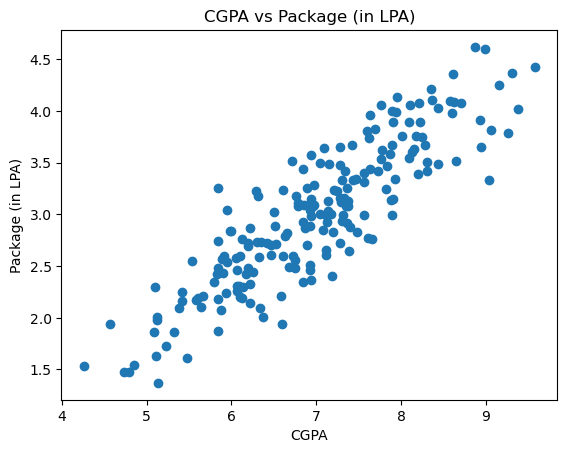

In [140]:
plt.scatter(df['cgpa'], df['package'])
plt.title('CGPA vs Package (in LPA)')
plt.xlabel('CGPA')
plt.ylabel('Package (in LPA)')
plt.show()

## Scikit-Learn Implementation:

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [142]:
X_train, X_test, y_train, y_test= train_test_split(
    df.drop(columns='package'), df['package'], test_size=0.2, random_state=42
)

In [143]:
reg= LinearRegression()

In [144]:
reg.fit(X_train, y_train)

LinearRegression()

In [145]:
y_pred= reg.predict(X_test)

In [148]:
print('R2 Score: ', r2_score(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))

R2 Score:  0.7730984312051673
Mean Absolute Error:  0.23150985393278373


## Scratch Implementation:

In [156]:
class GD_Regressor:

    def __init__(self, learning_rate, epochs):
        self.m= 0
        self.b= 0
        self.learning_rate= learning_rate
        self.epochs= epochs

    def fit(self,X_train, y_train):
        X_train = np.array(X_train).ravel()
        y_train = np.array(y_train).ravel()

        for i in range(self.epochs):
            
            loss_slope_b = -2 * np.sum(y_train - self.m * X_train - self.b)
            self.b = self.b - (self.learning_rate * loss_slope_b)

            loss_slope_m = -2 * np.sum((y_train - self.m * X_train - self.b) * X_train)
            self.m = self.m - (self.learning_rate * loss_slope_m)

    def predict(self, X_test):

        X_test = np.array(X_test).ravel()

        return self.m * X_test + self.b


In [169]:
gd= GD_Regressor(learning_rate=0.0001, epochs=500)

In [170]:
gd.fit(X_train, y_train)

In [171]:
y_pred1= gd.predict(X_test)

In [172]:
print('R2 Score: ', r2_score(y_test, y_pred1))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred1))

R2 Score:  0.762967502124394
Mean Absolute Error:  0.23225002122482574
